In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    count= 0
    print(dirname)
    for filename in filenames:
#         print(os.path.join(dirname, filename))
            count+=1
    print(f"Total {count} images")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
Total 0 images
/kaggle/input/mohanlal-mammooty-images
Total 0 images
/kaggle/input/mohanlal-mammooty-images/mammooty
Total 0 images
/kaggle/input/mohanlal-mammooty-images/mammooty/mammooty
Total 2295 images
/kaggle/input/mohanlal-mammooty-images/mohanlal
Total 0 images
/kaggle/input/mohanlal-mammooty-images/mohanlal/mohanlal
Total 2763 images


In [3]:
import PIL
import cv2
import numpy as np
import pathlib
import os

In [4]:
data_dir = pathlib.Path("/kaggle/input/mohanlal-mammooty-images")
m1_dir = list(data_dir.glob('mammooty/mammooty/*'))
m2_dir = list(data_dir.glob('mohanlal/mohanlal/*'))

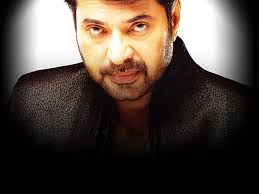

In [5]:
PIL.Image.open(m1_dir[1])

In [6]:
X,y=[],[]

for image in m1_dir:
        img=cv2.imread(str(image))
        X.append(cv2.resize(img,(180,180)))
        y.append(0)
for image in m2_dir:
        img=cv2.imread(str(image))
        X.append(cv2.resize(img,(180,180)))
        y.append(1)

In [7]:
X = np.array(X)
y = np.array(y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential,layers

In [11]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2,activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [12]:
model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
119/119 [==============================] - 19s 22ms/step - loss: 0.7288 - accuracy: 0.5452
Epoch 2/20
119/119 [==============================] - 2s 20ms/step - loss: 0.6679 - accuracy: 0.5927
Epoch 3/20
119/119 [==============================] - 2s 20ms/step - loss: 0.6052 - accuracy: 0.6726
Epoch 4/20
119/119 [==============================] - 2s 20ms/step - loss: 0.4969 - accuracy: 0.7625
Epoch 5/20
119/119 [==============================] - 2s 20ms/step - loss: 0.3840 - accuracy: 0.8157
Epoch 6/20
119/119 [==============================] - 2s 20ms/step - loss: 0.2414 - accuracy: 0.9030
Epoch 7/20
119/119 [==============================] - 2s 20ms/step - loss: 0.1421 - accuracy: 0.9510
Epoch 8/20
119/119 [==============================] - 2s 20ms/step - loss: 0.0926 - accuracy: 0.9750
Epoch 9/20
119/119 [==============================] - 2s 20ms/step - loss: 0.0535 - accuracy: 0.9879
Epoch 10/20
119/119 [==============================] - 2s 20ms/step - loss: 0.0554 - accur

In [13]:
model.predict(X_test_scaled)

40/40 [==============================] - 1s 10ms/step


array([[3.2342277e-02, 9.6765769e-01],
       [9.8744583e-01, 1.2554150e-02],
       [8.9825350e-01, 1.0174653e-01],
       ...,
       [4.8870105e-02, 9.5112991e-01],
       [7.2594499e-04, 9.9927408e-01],
       [4.4702389e-03, 9.9552983e-01]], dtype=float32)

In [14]:
model.evaluate(X_test_scaled,y_test)

40/40 [==============================] - 1s 11ms/step - loss: 1.2304 - accuracy: 0.7312


[1.2303751707077026, 0.731225311756134]

In [15]:
model.save('./model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
